In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)


In [2]:
df = pd.read_csv("youtube_trending_sample.csv")
df.head()


,title,channel_title,views,likes,dislikes,comment_count,publish_time
0,Dance Performance,WWE,2754238,1374343,38623,107512,2025-04-01 10:18:25.712449
1,Interview,PewDiePie,2680708,1000238,7392,147443,2025-06-02 10:18:25.712476
2,Movie Scene,Blackpink,3544679,862882,46717,133121,2024-07-18 10:18:25.712487
3,Dance Performance,MrBeast,18594856,380989,21556,162688,2025-09-22 10:18:25.712497
4,Funny Clips,PewDiePie,15656139,416515,38559,283076,2024-10-30 10:18:25.712507


In [3]:
df.info()
df.describe()
df.isnull().sum()
df.duplicated().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   title          60 non-null     object
 1   channel_title  60 non-null     object
 2   views          60 non-null     int64 
 3   likes          60 non-null     int64 
 4   dislikes       60 non-null     int64 
 5   comment_count  60 non-null     int64 
 6   publish_time   60 non-null     object
dtypes: int64(4), object(3)
memory usage: 3.4+ KB


np.int64(0)

This dataset contains trending YouTube video statistics.
Columns include:

title (Video name)

channel_title (Channel name)

views (Number of views)

likes (Number of likes)

dislikes (Number of dislikes)

comment_count (Number of comments)

publish_time (Date video was published)

In [4]:
df['publish_time'] = pd.to_datetime(df['publish_time'])


In [5]:
df = df.drop_duplicates()



In [6]:
df = df.dropna()


In [7]:
df['year'] = df['publish_time'].dt.year
df['month'] = df['publish_time'].dt.month
df['hour'] = df['publish_time'].dt.hour
df['like_ratio'] = df['likes'] / (df['likes'] + df['dislikes'] + 1)


How do likes and comments influence the popularity (views) of YouTube videos?

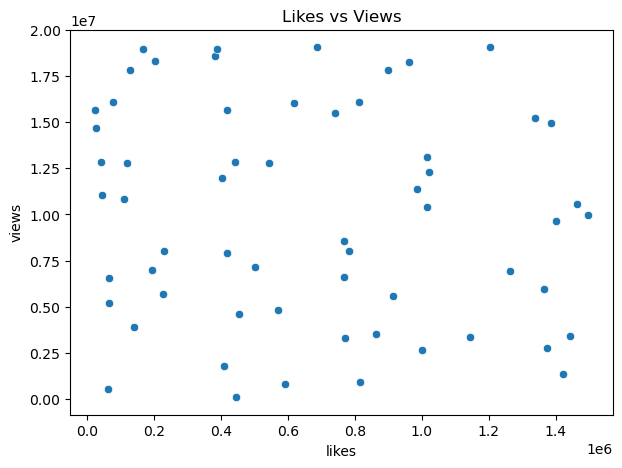

In [8]:
plt.figure(figsize=(7,5))
sns.scatterplot(data=df, x='likes', y='views')
plt.title("Likes vs Views")
plt.show()


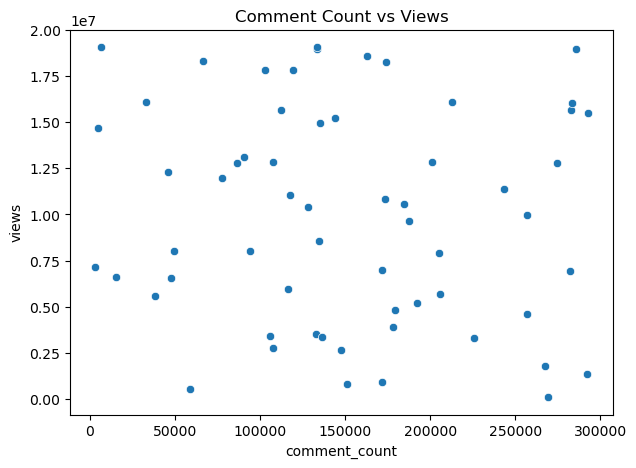

In [9]:
plt.figure(figsize=(7,5))
sns.scatterplot(data=df, x='comment_count', y='views')
plt.title("Comment Count vs Views")
plt.show()


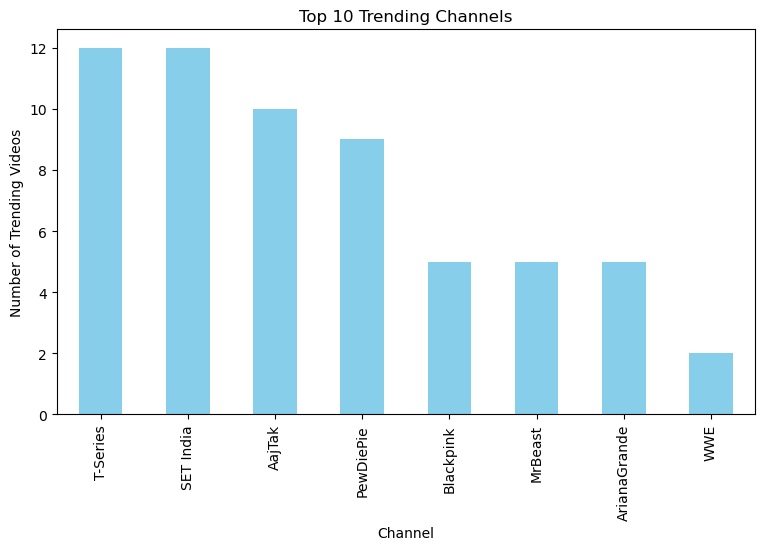

In [10]:
top_channels = df['channel_title'].value_counts().head(10)

plt.figure(figsize=(9,5))
top_channels.plot(kind='bar', color='skyblue')
plt.title("Top 10 Trending Channels")
plt.ylabel("Number of Trending Videos")
plt.xlabel("Channel")
plt.show()


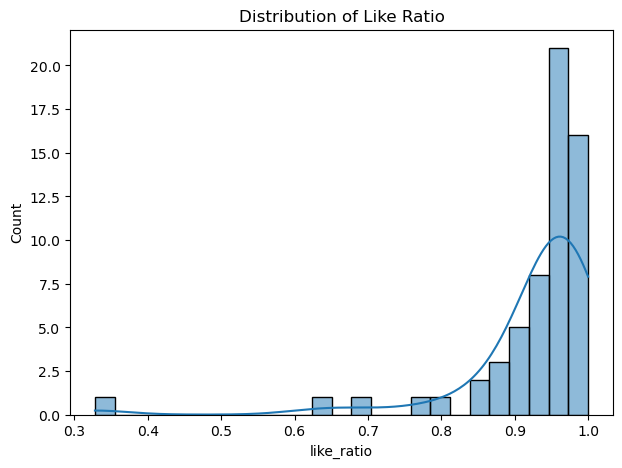

In [11]:
plt.figure(figsize=(7,5))
sns.histplot(df['like_ratio'], kde=True)
plt.title("Distribution of Like Ratio")
plt.show()


A positive relationship is observed between likes and views, meaning videos with more likes typically have more views.

Videos that receive more comments also tend to have higher engagement and reach.

Some channels consistently appear more in trending lists, which shows strong brand audience engagement.

The like ratio distribution suggests most trending videos receive high positive response.

Conclusion:
From this analysis, we conclude that:

Likes and comments significantly influence a video’s view count and trending potential.

Higher user engagement leads to better video visibility on the platform.

Established channels tend to trend more often due to audience loyalty and recognition.

The dataset only represents trending videos, not all uploaded videos.

External influences like ads, collaboration, or algorithm promotion are not included.

Engagement quality (positive or negative sentiment) is not measured.